# TP 1: Analyse en fréquence de signaux sonores.

## 1. Introduction à la FFT.
### On va utiliser la fft sur un signal 1D pour en regarder le contenu en fréquentiel.

In [47]:
import numpy as np
import scipy as sp
import pylab as pl

500


Text(0.5, 1.0, 'Une fonction créneau')

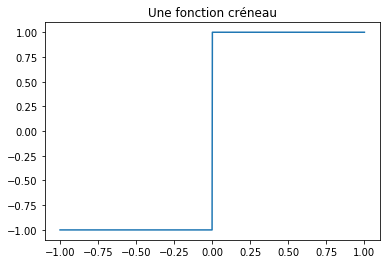

In [48]:
# Choose a grid x and a signal y
n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,n)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1
pl.plot(x,y)
pl.title("Une fonction créneau")

In [49]:
import scipy.fftpack as sf
# On utilise la fonction fft pour calculer la transformée de Fourier.
spectre = sf.fft(y)
# on utilise la fonction ifft pour calculer l'inverse.
inverse_du_spectre = sf.ifft(spectre)

### Exercice 1: 
+ Calculer la norme $L^2$ du signal et la norme $L^2$ de sa transformée de Fourier.
+ On vérifiera que la fft et l'inverse de la ftt sont bien inverses numériques. 

Norme du signal :  0.03162277660168379
Norme de sa TF :  1.0000000000000002
1.0254966362228638e-17
False


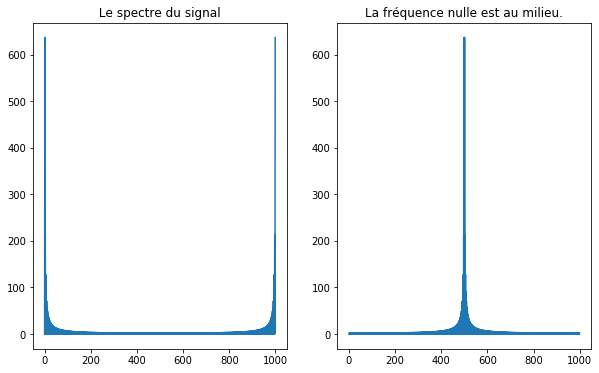

In [50]:
# illustration.
pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(np.abs(spectre))
pl.title(" Le spectre du signal ")
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(spectre)))
pl.title("La fréquence nulle est au milieu.")


#Normalisation du signal (que l'on utilise pas pendant le calcul de norme)
z = y/n

# normes l²
def norm(y):
    return (np.sqrt(np.sum(np.abs(y*y))))/n

print("Norme du signal : ", norm(y))
print("Norme de sa TF : ", norm(spectre))

# verifier que la fft et l'inverse de la fft sont bien inverse numérique

def is_numerical_inv(n):
    epsilon = 1e-20
    return abs(n) < epsilon

inv_sum = norm((inverse_du_spectre - y))
print(inv_sum)
print(is_numerical_inv(inv_sum))

### Exercice 2: 
+ lisez le code ci-dessous et expliquez ce qui est obtenu.

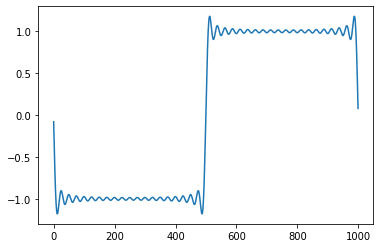

In [51]:
reduced = np.copy(spectre)
h = 40
reduced[h:n-h] = 0
reconstruct=sf.ifft(reduced)
pl.plot(np.real(reconstruct))

On obtient une réprensentation du signal filtré à l'aide d'un filtre passe-bas. On observe le phénomène de Gibbs.

### Exercice 3: 
+ Créer une gaussienne en utilisant la formule $e^{-x^2/\sigma^2}$ et tracer la transformée de Fourier de cette fonction.

0.1769223574889692


Text(0.5, 1.0, 'La TF de la gaussienne')

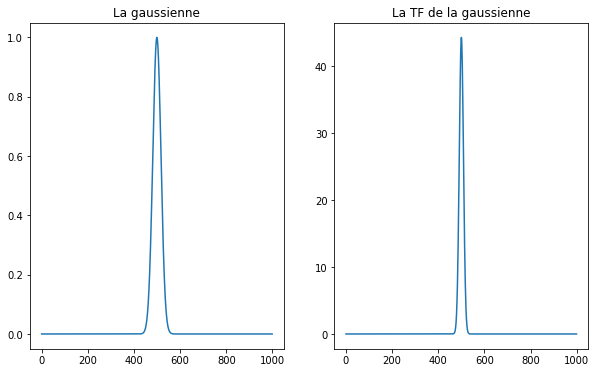

In [52]:
def gaussienne(x, sigma):
    return np.exp(-(x*x)/(sigma*sigma))

# print(gaussienne(0.05))
x = np.linspace(-1,1,n)
signal = gaussienne(x,0.05)
tf_gaussienne = sf.fft(signal)
print(norm(tf_gaussienne))


pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(np.abs(signal))
pl.title("La gaussienne")
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(tf_gaussienne)))
pl.title("La TF de la gaussienne")

### On va créer un signal de type sinusoidal numérique, qu'on va ensuite écouter.

In [63]:
fs = 44100 # fq d'échantillonage
T = 2 # duree du signal en secondes
fq = 440
points = np.arange(0,T * fs)/fs
y = 20*np.cos(2*np.pi*fq * points)

In [64]:
from IPython.display import Audio
Audio(10*y, rate = 44100)

### Exercice 4: 
+ Représenter le signal sur 2 dixièmes de seconde et compter le nombre de maximums pour en vérifier approximativement la fréquence du signal.
+ En utilisant la fft, représenter le contenu fréquentiel du signal. On s'attend à avoir un pic localisé en la fréquence utilisée pour la définition du signal.


La fréquence pour laquelle la transformée de Fourier est maximale est 0 Hz


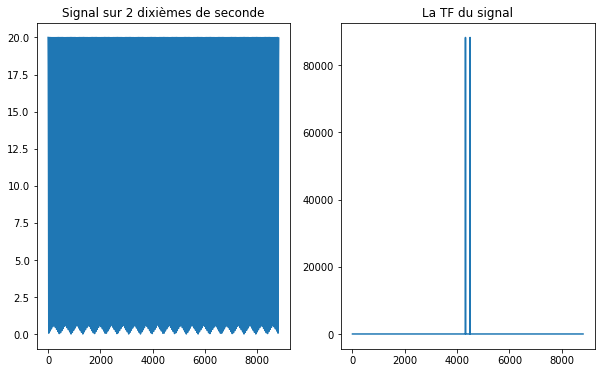

In [66]:
estimation_fq = 0
signal = y[:int(2*(y.size/20))]

pl.figure(figsize = (10,6))
pl.subplot(1,2,1)
pl.plot(np.abs(signal))
pl.title("Signal sur 2 dixièmes de seconde")
tf_signal = sf.fft(signal)
pl.subplot(1,2,2)
pl.plot(np.abs(sf.fftshift(tf_signal)))
pl.title("La TF du signal")

'''
def get_number_spikes(signal):
    return np.unravel_index(np.argmax(signal, axis=None), signal.shape)

print(get_number_spikes(signal))'''

message = "La fréquence pour laquelle la transformée de Fourier est maximale est {} Hz".format(estimation_fq)
print(message)

### Exercice 5:
+ En utilisant la fonction np.argmax, détecter la position du maximum de la fft du signal.
+ Traduire cette position en fréquence.

In [67]:
position = (np.argmax(tf_signal))
fq = (position / len(tf_signal)) * fs
print("La fréquence du maximum de la fft du signal est {} Hz".format(int(fq)))

La fréquence du maximum de la fft du signal est 440 Hz


## 2. Étude de signaux réels:
### On retrouve bien, dans ce cas, la fréquence du son qu'on a créé. On propose de faire la même chose pour un fichier son, qui est l'enregistrement d'une note de musique. On importe un fichier son, on lit la fréquence d'échantillonnage. Le signal étant stéréo, il y a, dans le même vecteur les deux sons concaténés: 

In [68]:
from scipy.io import wavfile
fs, data = wavfile.read('piano.wav')
print("la frequence est ",fs," donc 1 seconde du signal correspond à ",fs, " points")
print("la longueur du signal numerique mono est ",len(data)//2)

## On remet le signal à la dimension du "vrai" son.
data_stereo = np.reshape(data,(np.size(data)//2,2))
signal_mono = 0.5 * np.sum(data_stereo,axis = 1)
print("la longueur du signal mono en secondes est ", len(signal_mono)//fs)

la frequence est  44100  donc 1 seconde du signal correspond à  44100  points
la longueur du signal numerique mono est  460800
la longueur du signal mono en secondes est  20


### Exercice 6: 
+ Écouter le signal.
+ Le représenter en fonction du temps.
+ Représenter sa transformée de Fourier.
+ Que constatez-vous sur le spectre du signal ?

C:\Users\Laurine\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


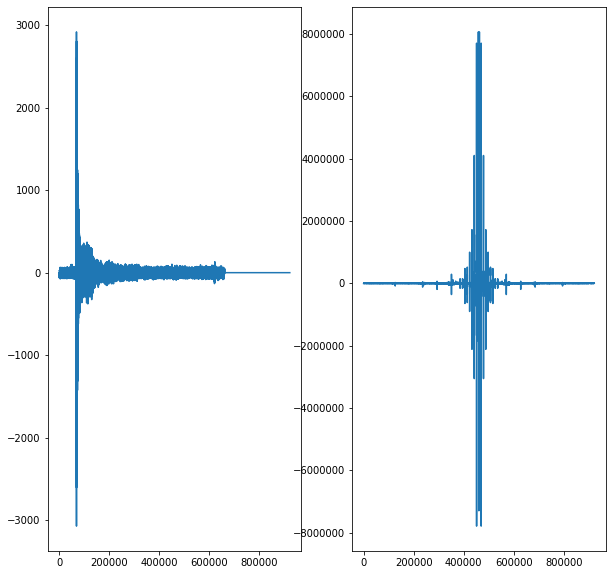

In [69]:
pl.figure(figsize = (10,10))
pl.subplot(1,2,1)
pl.plot(signal_mono)
pl.subplot(1,2,2)
tf_signal_mono = sf.fft(signal_mono)
pl.plot(sf.fftshift(tf_signal_mono))

Le signal est composé de plusieurs fréquences : la fréquence fondamentale et les harmoniques.

### FFT sur une sous partie du signal.
### Exercice 7:
+ Estimer l'instant où le son apparait.
+ Effectuer le même travail que précédemment pour une sous partie du signal: on prendra le signal fenêtré sur une longueur de $T$ secondes. Par exemple, $1.5$ secondes.

### Pour éviter de polluer le spectre avec les discontinuités aux bords avec les conditions périodiques de la FFT, on multiplie le signal fenêtré avec une fonction qui décroit vers $0$ aux bords de la fenêtre. Voir ci-dessous. 

22050
22050


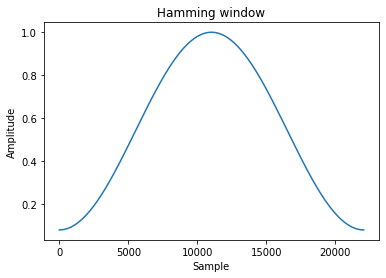

In [59]:
## On introduit une fenetre sur laquelle on va calculer la fft.
import scipy.signal as sig

start = 44100 * 2
length = int(44100 * 0.5)
print(length)### on considère un nombre d'échantillons d'une durée équivalente de 1.5 seconde
slices = slice(start,start+length,1)
window = sig.hamming(length)
print(np.size(window))

pl.plot(window)
pl.title("Hamming window")
pl.ylabel("Amplitude")
pl.xlabel("Sample")
pl.show()

### Exercice 8: 
+ Comparer la différence entre la fft du signal fenêtré et la fft du signal fenêtré et multiplié par la fonction de Hamming introduite ci-dessus.

### Exercice 9: On considère le signal ci-dessous qui est la prononciation d'une conçonne, un "s".
+ Que pouvez-vous dire du contenu fréquentiel du signal ?
+ Est-ce que la localisation d'une fréquence dominante a du sens dans ce cas ?

In [82]:
from scipy.io import wavfile
fs, data = wavfile.read('sss.wav')
print("la frequence est ",fs," donc 1 seconde du signal correspond à ",fs, " points")
print("la longueur du signal numerique mono est ",len(data)//2)
print("la forme du signal est "+str(np.shape(data)))
## On remet le signal à la dimension du "vrai" son.
data_stereo = np.reshape(data,(np.size(data)//2,2))
signal_mono = 0.5 * np.sum(data_stereo,axis = 1)
print("la longueur du signal mono en secondes est ", len(signal_mono)//fs)

la frequence est  44100  donc 1 seconde du signal correspond à  44100  points
la longueur du signal numerique mono est  25863
la forme du signal est (51727, 2)
la longueur du signal mono en secondes est  1


In [83]:
from IPython.display import Audio
Audio(signal_mono, rate = 44100)

C:\Users\Laurine\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


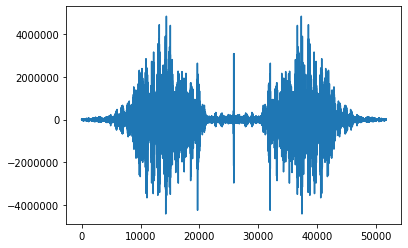

In [84]:
tf_signal = sf.fft(signal_mono)
pl.plot(sf.fftshift(tf_signal))

## 3. Le théorème de Shannon

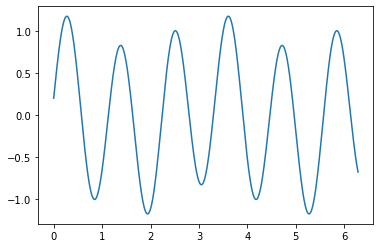

In [62]:
## On définit un signal
def mySignal(t):
    fq = 0.9
    fq2 = 0.3
    return np.sin(2*np.pi * fq*t) + 0.2*np.cos(2*np.pi * fq2*t)
x = np.linspace(0,2*np.pi,1000)
pl.plot(x,mySignal(x))
pl.show()

### Exercice 10: 
+ Choisissez un temps d'interpolation $T_e$ et montrer la reconstruction du signal en utilisant une interpolation linéaire, c'est-à-dire des segments entre les points de la courbe.
+ Implémenter la formule d'interpolation de Shannon et comparer avec l'interpolation linéaire; changer de forme de signal.

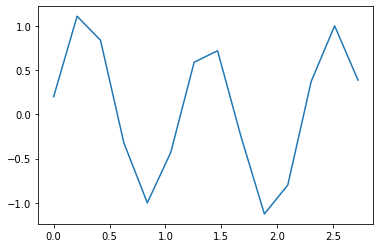

In [71]:
N = 15
Te = np.pi / N

sampled_signal = []
x0 = []

for i in range(0, N-1):
    n = i * Te
    sampled_signal.append(mySignal(n))
    x0.append(n)

pl.plot(x0, sampled_signal)
pl.show()

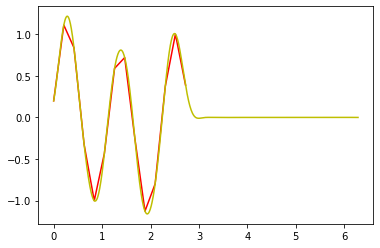

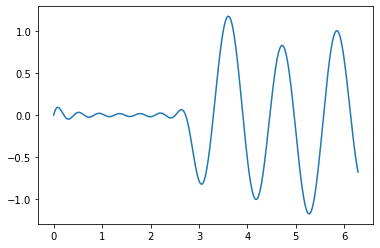

In [77]:
def sinc(t):
    x_temp = (np.pi*t) / Te
    return 1 if t == 0 else np.sin(x_temp) / x_temp

def shannon_reconstruct(t):
    signal_sum = 0
    for i in range(0, N-1):
        nTe = i * Te
        signal_sum += sampled_signal[i] * sinc(t-nTe)
    return signal_sum

shannon = np.vectorize(shannon_reconstruct)

x = np.linspace(0, 2 * np.pi, N-1)
x_analog = np.linspace(0, 2*np.pi, 1000)

pl.plot(x0, sampled_signal, 'r')
pl.plot(x_analog, shannon(x_analog), 'y')
pl.figure()
pl.plot(x_analog, mySignal(x_analog) - shannon(x_analog))
pl.show()